In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# The line down below is needed to prevent matplotlib to open the graph in a seaparate popup window. 
%matplotlib inline

Show DataFrame info.
Describe DataFrame.
Show a plot of the total number of responses.
Show a plot of the response rate by the sales channel.
Show a plot of the response rate by the total claim amount.
Show a plot of the response rate by income.

In [2]:
data = pd.read_csv(r'C:\Users\Megha\Desktop\Ironhack\Week_1\Day_4\Afternoon\lab-customer-analysis-round-3\files_for_lab\csv_files\marketing_customer_analysis.csv')
data.tail()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


In [3]:
#Show DataFrame info.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
#Describe DataFrame.
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


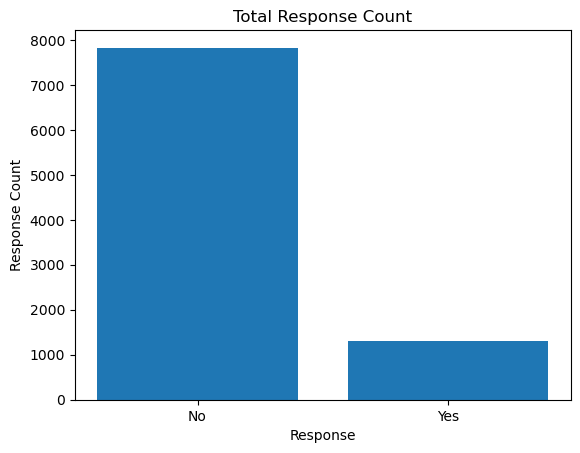

In [5]:
#Show a plot of the total number of responses.
fig, ax = plt.subplots()
ax.bar(x = data['Response'].value_counts().index, height = data['Response'].value_counts().values)
plt.xlabel('Response')
plt.ylabel('Response Count')
plt.title('Total Response Count')
plt.show()

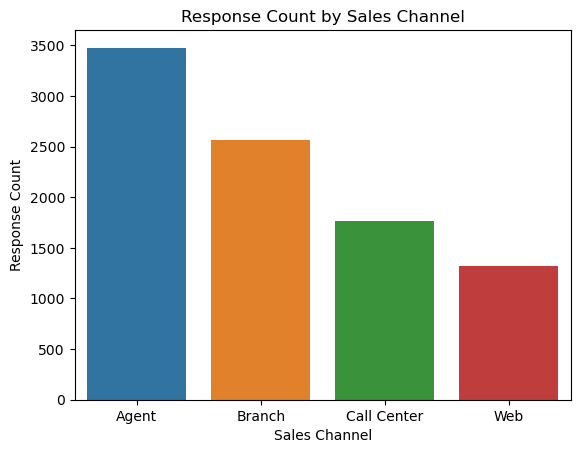

In [6]:
#Show a plot of the response rate by the sales channel.
fig, ax = plt.subplots()
group_sales = data.groupby("Sales Channel").agg({"Response":"count"}).reset_index()
group_sales.head()
sns.barplot(data=group_sales, x="Sales Channel", y="Response", ax = ax)
plt.xlabel('Sales Channel')
plt.ylabel('Response Count')
plt.title('Response Count by Sales Channel')
plt.show()

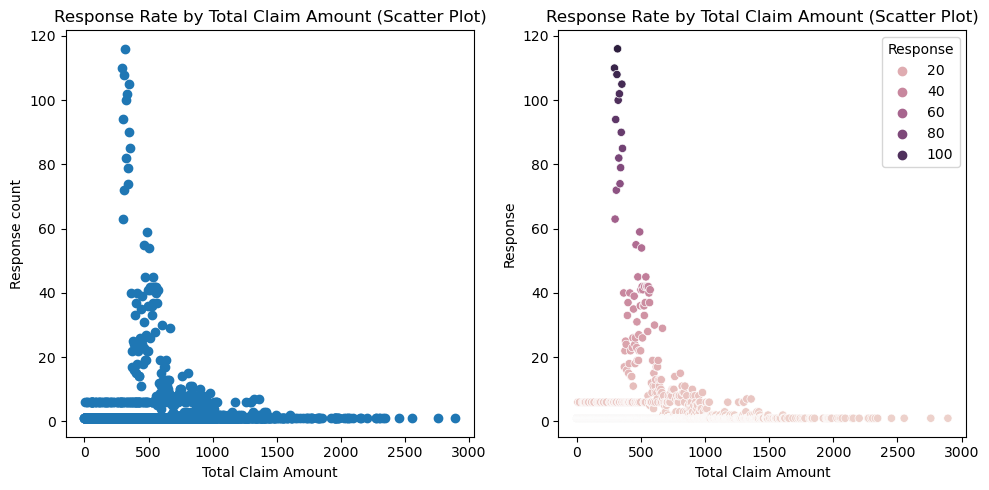

In [7]:
#Show a plot of the response rate by the total claim amount.
fix, ax = plt.subplots(1,2, figsize=(10,5))
claim_data= data.groupby("Total Claim Amount").agg({"Response":"count"}).reset_index()
ax[0].scatter(x=claim_data['Total Claim Amount'],y=claim_data['Response'])
ax[0].set_xlabel("Total Claim Amount")
ax[0].set_ylabel('Response count')
ax[0].set_title('Response Rate by Total Claim Amount (Scatter Plot)')
sns.scatterplot(claim_data, x='Total Claim Amount', y='Response',ax=ax[1],hue="Response")
plt.title('Response Rate by Total Claim Amount (Scatter Plot)')
plt.tight_layout()
plt.show()

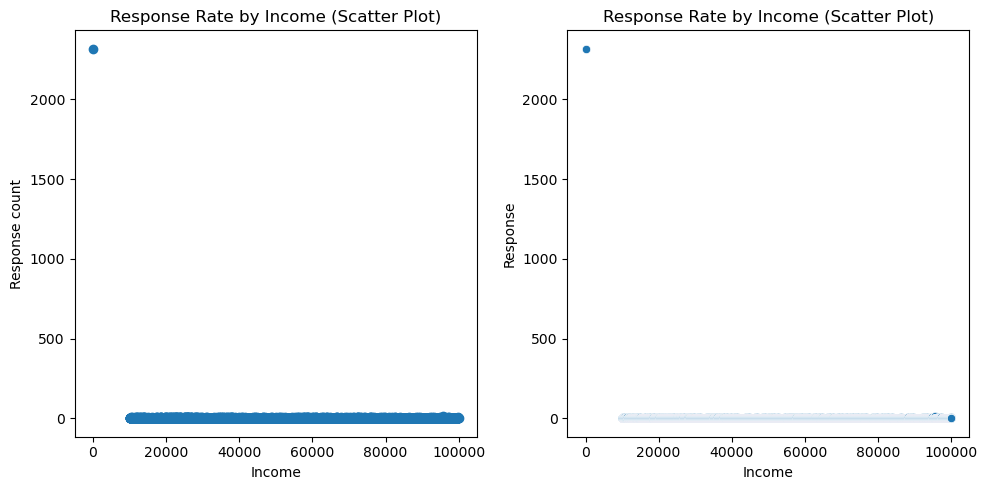

In [10]:
#Show a plot of the response rate by income.
fix, ax = plt.subplots(1,2, figsize=(10,5))
income_data= data.groupby("Income").agg({"Response":"count"}).reset_index()
ax[0].scatter(x=income_data['Income'],y=income_data['Response'])
ax[0].set_xlabel("Income")
ax[0].set_ylabel('Response count')
ax[0].set_title('Response Rate by Income (Scatter Plot)')
sns.scatterplot(data=income_data, x='Income', y='Response',ax=ax[1])
plt.title('Response Rate by Income (Scatter Plot)')
plt.tight_layout()
plt.show()